# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [5]:
sinasc_1.groupby('munResNome').mean().head()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
sinasc_2 = sinasc_raw[['ESCMAE', 'SEXO', 'PESO', 'DTNASC']]
sinasc_2.head()

,ESCMAE,SEXO,PESO,DTNASC
0,8 a 11 anos,Masculino,3685,2019-02-19
1,8 a 11 anos,Feminino,3055,2019-02-21
2,8 a 11 anos,Feminino,3460,2019-02-25
3,12 anos ou mais,Feminino,2982,2019-03-20
4,8 a 11 anos,Feminino,3310,2019-03-23


In [7]:
sinasc_2[sinasc_2['DTNASC'] == '2019-07-24'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean().to_frame()


PESO
ESCMAE          SEXO                  
1 a 3 anos      Masculino  3563.333333
12 anos ou mais Feminino   2883.000000
                Masculino  3363.454545
4 a 7 anos      Feminino   2772.500000
                Masculino  3560.000000
8 a 11 anos     Feminino   3089.473684
                Masculino  3480.666667

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [86]:
sinasc_1.munResNome.value_counts(ascending = True)[:2]

Município ignorado - RO     1
Castanheiras               32
Name: munResNome, dtype: int64

In [20]:
sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEMAE'].agg([min, 'mean', max]).to_frame()

,IDADEMAE
min,17.00000
mean,27.28125
max,39.00000


In [21]:
sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEPAI'].agg([min, 'mean', max]).to_frame()

,IDADEPAI
min,17.000000
mean,30.392857
max,43.000000


In [22]:
mini = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEMAE'].min()
media = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEMAE'].mean()
maxi = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEMAE'].max()
print(f'A idade minima da mãe: {mini}, a media: {media} e a maxima: {maxi}')

A idade minima da mãe: 17, a media: 27.28125 e a maxima: 39


In [23]:
mini = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEPAI'].min()
media = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEPAI'].mean()
maxi = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']['IDADEPAI'].max()
print(f'A idade minima do pai: {mini}, a media: {media} e a maxima: {maxi}')

A idade minima do pai: 17.0, a media: 30.392857142857142 e a maxima: 43.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [76]:
sinasc_3 = sinasc_raw[['DTNASC', 'IDADEMAE', 'IDADEPAI', 'munResNome', 'QTDFILVIVO']].copy()
sinasc_3.head(3)

,DTNASC,IDADEMAE,IDADEPAI,munResNome,QTDFILVIVO
0,2019-02-19,19,26.0,Alta Floresta D'Oeste,0.0
1,2019-02-21,29,24.0,Alta Floresta D'Oeste,1.0
2,2019-02-25,37,32.0,Alta Floresta D'Oeste,2.0


In [77]:
sinasc_3['MESANO'] = pd.DatetimeIndex(sinasc_3['DTNASC']).month
sinasc_3.head(3)

,DTNASC,IDADEMAE,IDADEPAI,munResNome,QTDFILVIVO,MESANO
0,2019-02-19,19,26.0,Alta Floresta D'Oeste,0.0,2
1,2019-02-21,29,24.0,Alta Floresta D'Oeste,1.0,2
2,2019-02-25,37,32.0,Alta Floresta D'Oeste,2.0,2


In [87]:
sinasc_3[sinasc_3['MESANO'] == 3].munResNome.value_counts()[:1]

Porto Velho    744
Name: munResNome, dtype: int64

In [91]:
sinasc_3[sinasc_3['munResNome'] == 'Porto Velho']['QTDFILVIVO'].agg([min, 'mean', max]).to_frame()

,QTDFILVIVO
min,0.000000
mean,1.167236
max,12.000000


In [93]:
sinasc_3[sinasc_3['munResNome'] == 'Porto Velho']['IDADEMAE'].agg([min, 'mean', max]).to_frame()

,IDADEMAE
min,12.00000
mean,26.31267
max,47.00000


In [94]:
sinasc_3[sinasc_3['munResNome'] == 'Porto Velho']['IDADEPAI'].agg([min, 'mean', max]).to_frame()

,IDADEPAI
min,16.000000
mean,32.352679
max,65.000000


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [216]:
sinasc_4 = sinasc_raw[['ESCMAE', 'GESTACAO', 'PARTO', 'SEXO', 'PESO',
                       'munResNome', 'IDADEMAE', 'ESTCIVMAE', 'CONSULTAS', 'APGAR1', 'APGAR5']].copy()
sinasc_4.head(3)

,ESCMAE,GESTACAO,PARTO,SEXO,PESO,munResNome,IDADEMAE,ESTCIVMAE,CONSULTAS,APGAR1,APGAR5
0,8 a 11 anos,37 a 41 semanas,Cesáreo,Masculino,3685,Alta Floresta D'Oeste,19,5.0,4,9.0,10.0
1,8 a 11 anos,37 a 41 semanas,Cesáreo,Feminino,3055,Alta Floresta D'Oeste,29,2.0,4,8.0,9.0
2,8 a 11 anos,37 a 41 semanas,Cesáreo,Feminino,3460,Alta Floresta D'Oeste,37,9.0,4,8.0,10.0


In [217]:
sinasc_4.ESTCIVMAE = sinasc_4.ESTCIVMAE.map({1.0:'Solteira', 2.0:'Casada', 3.0:'Viuva', 4.0:'Divorciada', 9.0:'Nao Informado'})

In [218]:
sinasc_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESCMAE      26716 non-null  object 
 1   GESTACAO    25796 non-null  object 
 2   PARTO       26979 non-null  object 
 3   SEXO        27024 non-null  object 
 4   PESO        27028 non-null  int64  
 5   munResNome  27028 non-null  object 
 6   IDADEMAE    27028 non-null  int64  
 7   ESTCIVMAE   19531 non-null  object 
 8   CONSULTAS   27028 non-null  int64  
 9   APGAR1      26932 non-null  float64
 10  APGAR5      26925 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.3+ MB


In [219]:
def top(df, n = 5, column = ''):
    return df.fillna(0).sort_values(by = column, ascending = False)[:n]

Tanto o APGAR1 medio e o APGAR5 medio são parecidos quando agrupados por tempo de gestacaçao e sexo da criança

In [229]:
sinasc_4.groupby(['GESTACAO', 'SEXO'])[['APGAR1', 'APGAR5']].mean()

APGAR1    APGAR5
GESTACAO            SEXO                         
22 a 27 semanas     Feminino   5.363636  6.755556
                    Masculino  5.375000  6.475000
28 a 31 semanas     Feminino   6.525000  7.887500
                    Masculino  6.682927  8.085366
32 a 36 semanas     Feminino   7.842761  8.906999
                    Masculino  7.806723  8.915966
37 a 41 semanas     Feminino   8.213863  9.230573
                    Masculino  8.169658  9.218820
42 semanas e mais   Feminino   8.145015  9.253776
                    Masculino  8.098361  9.188011
Menos de 22 semanas Feminino   5.666667  6.500000
                    Masculino  7.000000  7.000000

A diferença normalmente a media de peso de crianças masculinos são maiores que a média do peso de crianças femeninas, com exceção as crianças nascidas entre 28 e 31 semanas de gestação.  

In [228]:
sinasc_4.groupby(['GESTACAO', 'SEXO'])[['APGAR1', 'APGAR5', 'PESO']].mean()

APGAR1    APGAR5         PESO
GESTACAO            SEXO                                      
22 a 27 semanas     Feminino   5.363636  6.755556  1157.666667
                    Masculino  5.375000  6.475000  1226.439024
28 a 31 semanas     Feminino   6.525000  7.887500  1734.222222
                    Masculino  6.682927  8.085366  1666.750000
32 a 36 semanas     Feminino   7.842761  8.906999  2627.598291
                    Masculino  7.806723  8.915966  2764.774895
37 a 41 semanas     Feminino   8.213863  9.230573  3251.586698
                    Masculino  8.169658  9.218820  3373.804669
42 semanas e mais   Feminino   8.145015  9.253776  3314.201807
                    Masculino  8.098361  9.188011  3455.576087
Menos de 22 semanas Feminino   5.666667  6.500000  1869.166667
                    Masculino  7.000000  7.000000  2435.000000

In [232]:
sinasc_4.groupby('GESTACAO')['SEXO'].value_counts().to_frame()

SEXO
GESTACAO            SEXO            
22 a 27 semanas     Feminino      45
                    Masculino     41
28 a 31 semanas     Masculino     84
                    Feminino      81
32 a 36 semanas     Masculino   1195
                    Feminino    1053
37 a 41 semanas     Masculino  11565
                    Feminino   11021
42 semanas e mais   Masculino    368
                    Feminino     332
Menos de 22 semanas Feminino       6
                    Masculino      1

Observa-se que os valores superiores de APGAR1 e APGAR5 superiores a 7, que são tidos como normais, ocorrem com crianças entre 32 a 41 semanas de gestação. E os casos de asfixia grave, valores menores que 3, são observados para todas as faixas de gestação, tendo uma frequencia maior de crianças entre 22 a 27 semanas. 

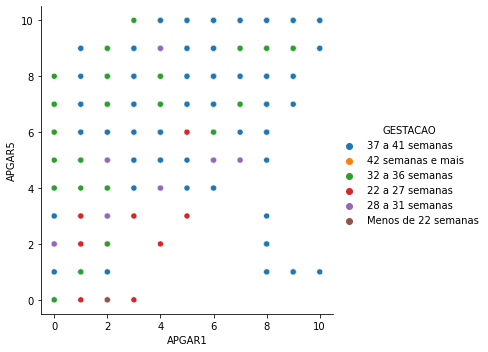

In [177]:
sns.relplot(data=sinasc_4, x='APGAR1', y='APGAR5', hue='GESTACAO');

Nota-se uma frequencia maior para partos cesáreos para todas as faixas de gestação, com exceção da faixa entre 22 a 27 semanas, que apresenta 62 partos Vaginal e 23 Cesáreo. 

In [211]:
sinasc_4.groupby('GESTACAO')['PARTO'].value_counts().unstack()

PARTO,Cesáreo,Vaginal
GESTACAO,,
22 a 27 semanas,23,62
28 a 31 semanas,90,75
32 a 36 semanas,1486,758
37 a 41 semanas,15199,7358
42 semanas e mais,408,292
Menos de 22 semanas,3,4


In [209]:
sinasc_4.groupby('PARTO')['SEXO'].value_counts().unstack()

SEXO,Feminino,Masculino
PARTO,,
Cesáreo,8737,9296
Vaginal,4372,4570


In [212]:
sinasc_4.groupby(['GESTACAO', 'PARTO'])['SEXO'].value_counts().unstack()

SEXO                         Feminino  Masculino
GESTACAO            PARTO                       
22 a 27 semanas     Cesáreo      11.0       12.0
                    Vaginal      33.0       29.0
28 a 31 semanas     Cesáreo      42.0       48.0
                    Vaginal      39.0       36.0
32 a 36 semanas     Cesáreo     710.0      775.0
                    Vaginal     340.0      418.0
37 a 41 semanas     Cesáreo    7376.0     7821.0
                    Vaginal    3627.0     3730.0
42 semanas e mais   Cesáreo     192.0      216.0
                    Vaginal     140.0      152.0
Menos de 22 semanas Cesáreo       2.0        1.0
                    Vaginal       4.0        NaN

In [223]:
sinasc_4.groupby('GESTACAO')['ESTCIVMAE'].value_counts().unstack()

ESTCIVMAE,Casada,Divorciada,Nao Informado,Solteira,Viuva
GESTACAO,,,,,
22 a 27 semanas,24.0,NaN,NaN,43.0,NaN
28 a 31 semanas,57.0,4.0,1.0,76.0,NaN
32 a 36 semanas,801.0,31.0,8.0,925.0,8.0
37 a 41 semanas,8294.0,388.0,120.0,7326.0,46.0
42 semanas e mais,220.0,13.0,5.0,206.0,2.0
Menos de 22 semanas,1.0,NaN,NaN,4.0,NaN


Observou-se que a frequencia de mulheres solteiras que optaram pelo parto vaginal é maior em relaçao as as mulheres casadas que optaram pelo mesmo tipo de parto. Em contrapartida a frequencia de mulheres solteiras que optaram pelo parto cesáreo é menor em 
relação as mulheres casadas que optaram pelo mesmo parto. 

In [222]:
sinasc_4.groupby(['GESTACAO', 'PARTO'])['ESTCIVMAE'].value_counts().unstack()

ESTCIVMAE                    Casada  Divorciada  Nao Informado  Solteira  \
GESTACAO            PARTO                                                  
22 a 27 semanas     Cesáreo     6.0         NaN            NaN      12.0   
                    Vaginal    18.0         NaN            NaN      30.0   
28 a 31 semanas     Cesáreo    33.0         3.0            1.0      40.0   
                    Vaginal    24.0         1.0            NaN      36.0   
32 a 36 semanas     Cesáreo   613.0        25.0            5.0     568.0   
                    Vaginal   187.0         6.0            3.0     355.0   
37 a 41 semanas     Cesáreo  6361.0       297.0           62.0    4814.0   
                    Vaginal  1914.0        91.0           57.0    2505.0   
42 semanas e mais   Cesáreo   144.0         7.0            4.0     132.0   
                    Vaginal    76.0         6.0            1.0      74.0   
Menos de 22 semanas Cesáreo     NaN         NaN            NaN       2.0   
                    Vaginal     1.0         NaN            NaN       2.0   

ESTCIVMAE                    Viuva  
GESTACAO            PARTO           
22 a 27 semanas     Cesáreo    NaN  
                    Vaginal    NaN  
28 a 31 semanas     Cesáreo    NaN  
                    Vaginal    NaN  
32 a 36 semanas     Cesáreo    6.0  
                    Vaginal    2.0  
37 a 41 semanas     Cesáreo   32.0  
                    Vaginal   14.0  
42 semanas e mais   Cesáreo    1.0  
                    Vaginal    1.0  
Menos de 22 semanas Cesáreo    NaN  
                    Vaginal    NaN

In [224]:
sinasc_4.groupby(['GESTACAO', 'PARTO', 'SEXO'])['ESTCIVMAE'].value_counts().unstack()

ESTCIVMAE                              Casada  Divorciada  Nao Informado  \
GESTACAO            PARTO   SEXO                                           
22 a 27 semanas     Cesáreo Feminino      2.0         NaN            NaN   
                            Masculino     4.0         NaN            NaN   
                    Vaginal Feminino     12.0         NaN            NaN   
                            Masculino     6.0         NaN            NaN   
28 a 31 semanas     Cesáreo Feminino     14.0         2.0            NaN   
                            Masculino    19.0         1.0            1.0   
                    Vaginal Feminino     12.0         1.0            NaN   
                            Masculino    12.0         NaN            NaN   
32 a 36 semanas     Cesáreo Feminino    298.0        14.0            NaN   
                            Masculino   314.0        11.0            5.0   
                    Vaginal Feminino     80.0         5.0            2.0   
                            Masculino   107.0         1.0            1.0   
37 a 41 semanas     Cesáreo Feminino   3144.0       139.0           27.0   
                            Masculino  3216.0       158.0           35.0   
                    Vaginal Feminino    949.0        42.0           35.0   
                            Masculino   965.0        49.0           22.0   
42 semanas e mais   Cesáreo Feminino     71.0         3.0            4.0   
                            Masculino    73.0         4.0            NaN   
                    Vaginal Feminino     40.0         3.0            1.0   
                            Masculino    36.0         3.0            NaN   
Menos de 22 semanas Cesáreo Feminino      NaN         NaN            NaN   
                    Vaginal Feminino      1.0         NaN            NaN   

ESTCIVMAE                              Solteira  Viuva  
GESTACAO            PARTO   SEXO                        
22 a 27 semanas     Cesáreo Feminino        7.0    NaN  
                            Masculino       5.0    NaN  
                    Vaginal Feminino       13.0    NaN  
                            Masculino      17.0    NaN  
28 a 31 semanas     Cesáreo Feminino       19.0    NaN  
                            Masculino      21.0    NaN  
                    Vaginal Feminino       18.0    NaN  
                            Masculino      18.0    NaN  
32 a 36 semanas     Cesáreo Feminino      273.0    4.0  
                            Masculino     295.0    2.0  
                    Vaginal Feminino      158.0    1.0  
                            Masculino     197.0    1.0  
37 a 41 semanas     Cesáreo Feminino     2298.0   17.0  
                            Masculino    2515.0   15.0  
                    Vaginal Feminino     1211.0    6.0  
                            Masculino    1293.0    8.0  
42 semanas e mais   Cesáreo Feminino       65.0    1.0  
                            Masculino      67.0    NaN  
                    Vaginal Feminino       35.0    NaN  
                            Masculino      39.0    1.0  
Menos de 22 semanas Cesáreo Feminino        2.0    NaN  
                    Vaginal Feminino        2.0    NaN

Nota-se que quanto maior foi a quantidade de consultas realizada pela paciente maior foi o numero de partos cesáreos. Sendo que as pascientes que realizaram 7 ou mais consultas (opão 4), a frequencia das que optaram pelo parto Cesáreo foi 2,5 vezes maior quando comparados as que realizaram o parto Vaginal.  

In [234]:
sinasc_4.groupby('PARTO')['CONSULTAS'].value_counts().unstack()

CONSULTAS,1,2,3,4,9
PARTO,,,,,
Cesáreo,571,650,3587,13204,24
Vaginal,400,728,2393,5395,27


In [236]:
sinasc_4.groupby(['PARTO','CONSULTAS'])['ESTCIVMAE'].value_counts().unstack()

ESTCIVMAE          Casada  Divorciada  Nao Informado  Solteira  Viuva
PARTO   CONSULTAS                                                    
Cesáreo 1           231.0         9.0            2.0     252.0    2.0
        2           151.0        12.0            2.0     343.0    NaN
        3          1228.0        65.0           15.0    1407.0    9.0
        4          5961.0       260.0           60.0    3758.0   29.0
        9            11.0         NaN            NaN      11.0    NaN
Vaginal 1            80.0         2.0            3.0     258.0    1.0
        2            86.0         9.0            3.0     401.0    1.0
        3           439.0        18.0           18.0     982.0    5.0
        4          1708.0        77.0           41.0    1512.0   10.0
        9             2.0         1.0            NaN      16.0    NaN